### AIE21080 Siddhartha

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import IPython.display as ipd
import numpy as np

### Question-1

Use librosa.effects.trim() to remove the silence parts of speech from beginning and
end of your recorded signal. Listen to the new signal and perceptually compare the audio with
original.

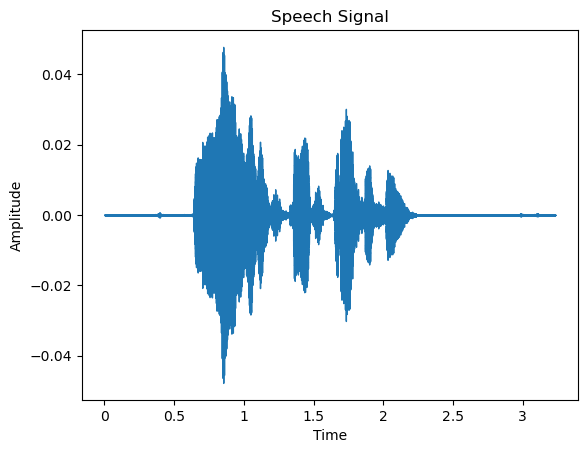

In [2]:
y, sr = librosa.load('Lab03.mp3')
librosa.display.waveshow(y)
plt.title('Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

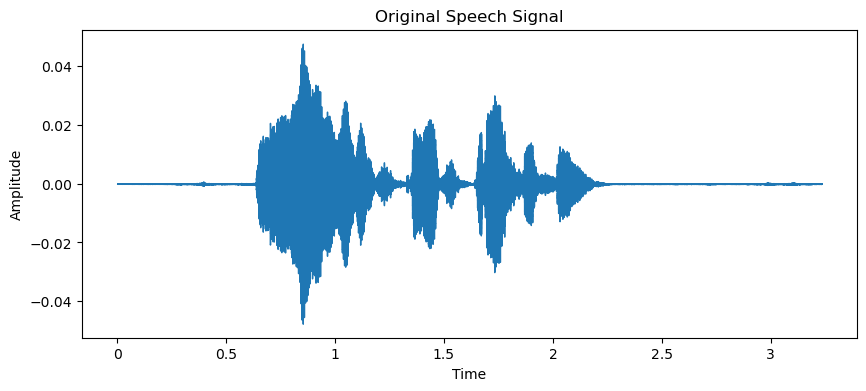

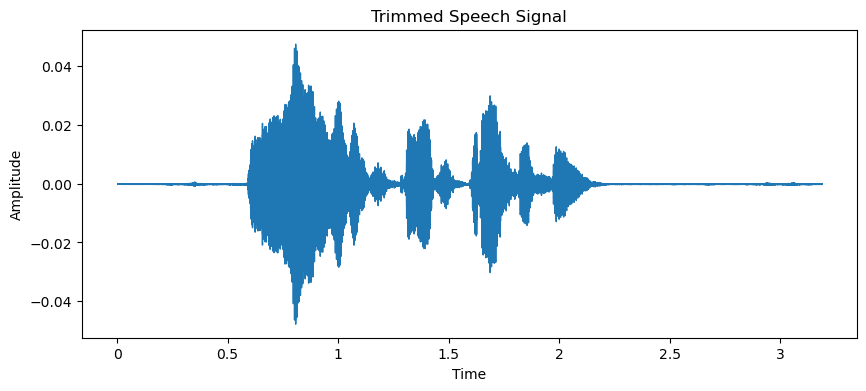

In [3]:
import librosa
import matplotlib.pyplot as plt

# Load the audio file
y, sr = librosa.load('Lab03.mp3')

# Display the original speech signal
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


# Trim the silent parts from the beginning and end of the signal
y_trimmed,index= librosa.effects.trim(y)

# Display the trimmed speech signal
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y_trimmed, sr=sr)
plt.title('Trimmed Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [4]:
print("Original Speech Signal")
Audio(data=y, rate=sr)

Original Speech Signal


In [5]:
print("Trimmed Speech Signal")
Audio(data=y_trimmed, rate=sr)

Trimmed Speech Signal


### Question-2

Use librosa.effects.split() to split the recorded speech with detected silences. Play
around with the top_db parameter and see the effects of split. Listen to the generated signals and
observe the split quality

In [6]:
y, sr = librosa.load('Lab03.mp3')

segments = librosa.effects.split(y, top_db=20)  # Adjust top_db as needed

for i, segment in enumerate(segments):
    start, end = segment
    segment_audio = y[start:end]

    print(f"Playing Segment {i+1}: Duration {len(segment_audio)/sr} seconds")
    display(Audio(segment_audio, rate=sr))

Playing Segment 1: Duration 0.6965986394557823 seconds


Playing Segment 2: Duration 0.25541950113378686 seconds


Playing Segment 3: Duration 0.5572789115646258 seconds


Splitting with top_db=1


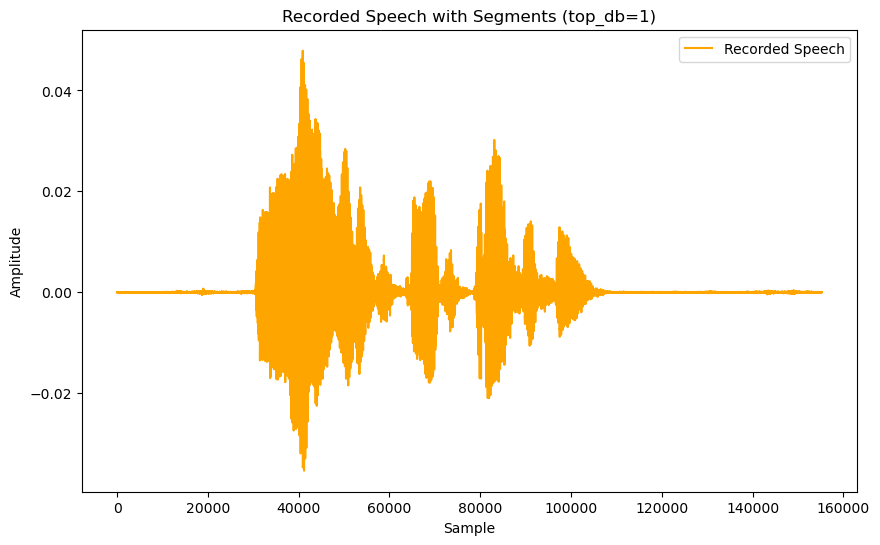

Splitting with top_db=10


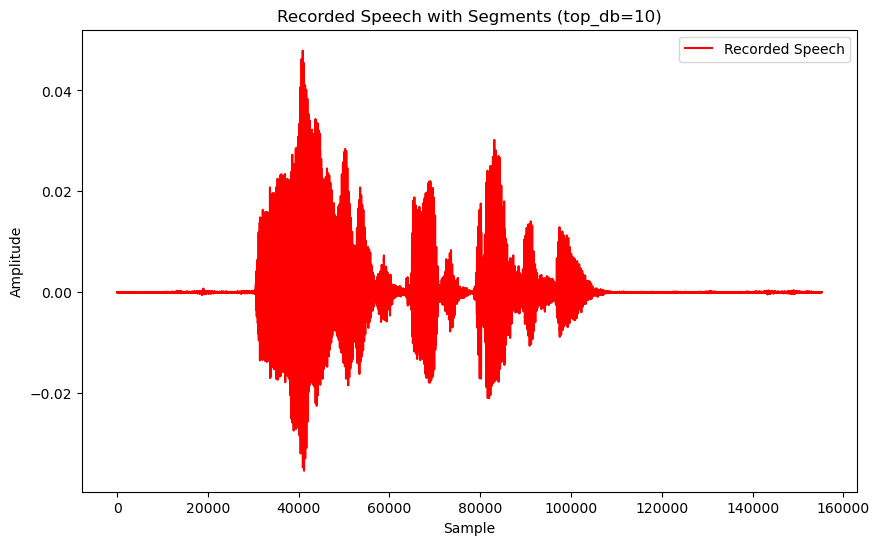

Splitting with top_db=20


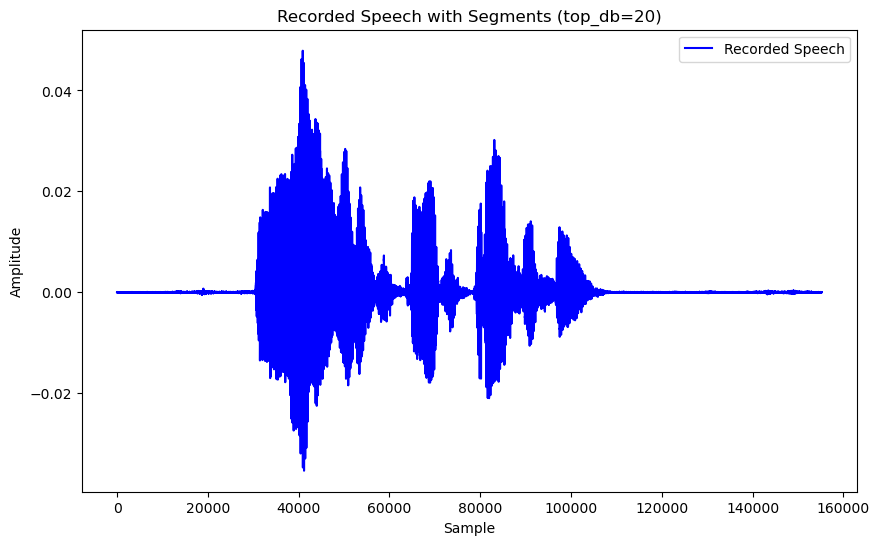

Splitting with top_db=40


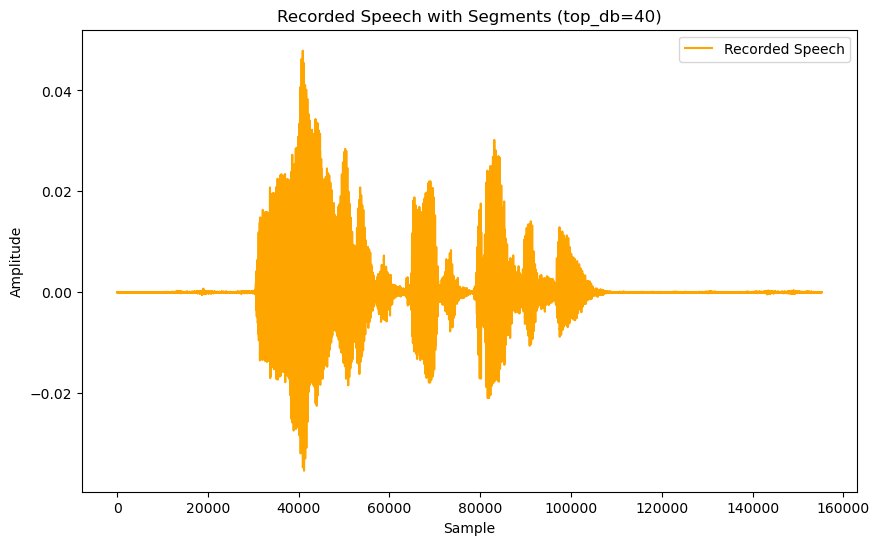

Listening to segments with top_db=1:


Listening to segments with top_db=10:


Listening to segments with top_db=20:


Listening to segments with top_db=40:


In [10]:
import librosa
import soundfile as sf
import IPython.display as ipd
import random

recorded_speech, sr = librosa.load('Lab03.mp3', sr=None)

def split_and_save(top_db):
    segments = librosa.effects.split(recorded_speech, top_db=top_db)
    c = ['red','green','blue','orange']
    plt.figure(figsize=(10, 6))
    plt.plot(recorded_speech, color=random.choice(c), label='Recorded Speech')

    for i, segment in enumerate(segments):
        start, end = segment
        segment_audio = recorded_speech[start:end]
        sf.write(f'segment_{i}.wav', segment_audio, sr)

    plt.title(f"Recorded Speech with Segments (top_db={top_db})")
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

top_db_values = [1, 10, 20,40]

for top_db in top_db_values:
    print(f"Splitting with top_db={top_db}")
    split_and_save(top_db)

# Listen to the generated signals
for i in range(len(top_db_values)):
    print(f"Listening to segments with top_db={top_db_values[i]}:")
    for j in range(len(librosa.effects.split(recorded_speech, top_db=top_db_values[i]))):
        ipd.display(ipd.Audio(f'segment_{j}.wav'))